In [1]:
import staintools
import csv
import os
import glob
import re
from pandas import DataFrame, Series
from PIL import Image
import timeit
import time
import cv2

In [2]:
train_paths = ["/scratch/as3ek/chrc_data_case_preserved_2000/train/EE/"]

In [3]:
# get images
images = {}
images_by_folder = {}
for train_path in train_paths:
    images_by_folder[str(train_path)] = []
    files = glob.glob(os.path.join(train_path, '*.jpg'))
    for fl in files:
        flbase = os.path.basename(fl)
        flbase_noext = os.path.splitext(flbase)[0]
        images[flbase_noext]=fl
        images_by_folder[str(train_path)].append(flbase_noext)

In [4]:
# initialize stain and brightness normalizer
stain_normalizer = staintools.StainNormalizer(method='vahadane')
standardizer = staintools.BrightnessStandardizer()

In [5]:
# choose target image
target_image = staintools.read_image("/scratch/as3ek/chrc_data_case_preserved_2000/train/Normal/N14-02_05___1000_1000.jpg")
standard_target_image = standardizer.transform(target_image)

In [6]:
# fit the normalizer
stain_normalizer.fit(standard_target_image)

In [7]:
i1 = staintools.read_image('/scratch/as3ek/chrc_data_case_preserved_2000/train/EE/108___0_4000.jpg')
i2 = staintools.read_image('/scratch/as3ek/chrc_data_case_preserved_2000/train/Celiac/C03-05_06___1000_5000.jpg')
i3 = staintools.read_image('/scratch/as3ek/chrc_data_case_preserved_2000/train/Normal/N14-01_01___4000_6050.jpg')
i4 = staintools.read_image('/scratch/as3ek/chrc_data_case_preserved_2000/train/Normal/N14-02_05___1000_1000.jpg')
i5 = staintools.read_image('/scratch/as3ek/chrc_data_case_preserved_2000/train/EE/130365_6716_001___3633_5000.jpg')

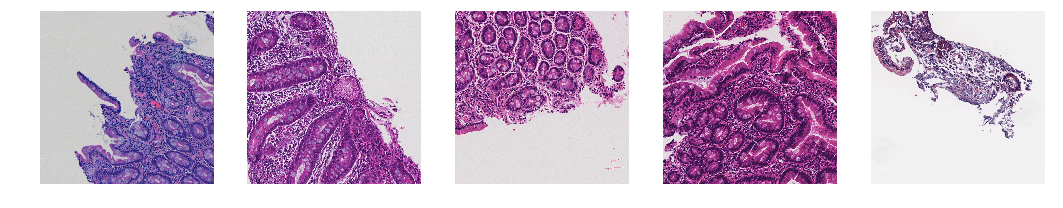

In [8]:
images = [i1, i2, i3, i4, i5]
titles = ["Target"] + ["Original"] * 4
staintools.plot_image_stack(images, width=5)

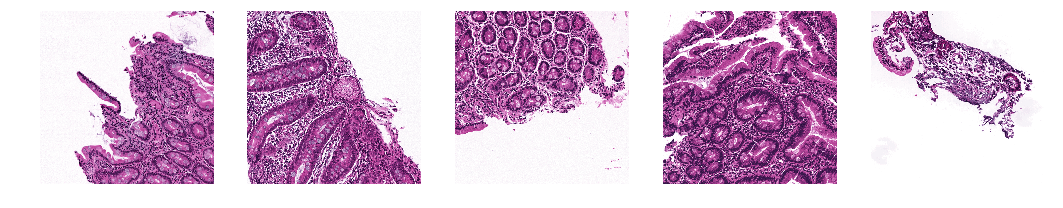

In [9]:
# Normalize to stain of first image
i1 = standardizer.transform(i1)
i2 = standardizer.transform(i2)
i3 = standardizer.transform(i3)
i4 = standardizer.transform(i4)
i5 = standardizer.transform(i5)

i1_normalized = stain_normalizer.transform(i1)
i2_normalized = stain_normalizer.transform(i2)
i3_normalized = stain_normalizer.transform(i3)
i4_normalized = stain_normalizer.transform(i4)
i5_normalized = stain_normalizer.transform(i5)

# Plot
images = [i1_normalized, i2_normalized, i3_normalized, i4_normalized, i5_normalized]
titles = ["Target standardized"] + ["Original standardized"] * 4
staintools.plot_image_stack(images, width=5)

In [10]:
# get destination path
path_change_map = {}

for key in list(images_by_folder.keys()):
    temp = key.replace('chrc_data_case_preserved_2000', 'chrc_data_case_preserved_2000_normal')
    path_change_map[key] = temp

count = 0
for key in images_by_folder.keys():
    for value in images_by_folder[key]:
        source_img_path = str(key) + '/' + str(value) + '.jpg'
        dest_img_path = str(path_change_map[key]) + '/' + str(value) + '.jpg'
        img = staintools.read_image(source_img_path)
        # standardize brightness
        img_standard = standardizer.transform(img)
        # transform the images
        img_normalized = stain_normalizer.transform(img_standard)
        # write image to path
        cv2.imwrite(dest_img_path, img_normalized)
        count += 1
        print(value + ' Saved! Count: ' + str(count))

130369_6721_001___3000_14000 Saved! Count: 1
50___3000_6000 Saved! Count: 2
42___2000_2000 Saved! Count: 3
35___4000_4000 Saved! Count: 4
73___3000_4000 Saved! Count: 5
51___3000_3551 Saved! Count: 6
29___1000_3000 Saved! Count: 7
35___2000_5000 Saved! Count: 8
130375_6727_001___1000_4955 Saved! Count: 9
111___0_4000 Saved! Count: 10
84___5000_4000 Saved! Count: 11
35___3000_6326 Saved! Count: 12
130375_6727_001___4000_1000 Saved! Count: 13
59___1000_1000 Saved! Count: 14
53___1000_9000 Saved! Count: 15
23___16304_2000 Saved! Count: 16
130369_6721_001___5000_15000 Saved! Count: 17
108___7000_4000 Saved! Count: 18
111___2000_2000 Saved! Count: 19
16_001___2000_0 Saved! Count: 20
116___0_4000 Saved! Count: 21
130368_6720_001___5000_3000 Saved! Count: 22
87___1000_6000 Saved! Count: 23
77___6000_7000 Saved! Count: 24
130366_6717_001___2000_5000 Saved! Count: 25
53___3000_4000 Saved! Count: 26
111___4000_6000 Saved! Count: 27
53___6000_5000 Saved! Count: 28
59___4000_1000 Saved! Count: 29
